# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (34 puntos)

**Volumen máximo**. Considere un cono circular recto inscrito en una esfera de radio $r$:

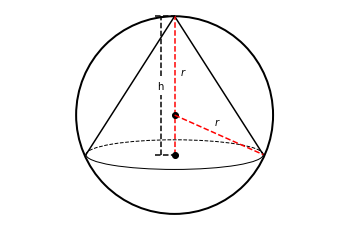

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, -0.4), 1.8,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, -0.4), 1.8,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0), 1,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([0.9,0,-0.9],[-0.4,1,-0.4],'k')
plt.plot([0,0],[-0.4,1],'--r')
plt.plot([0,0],[-0.4,0],'ok')
plt.plot([0,0.9],[0,-0.4],'--r')
plt.plot([-0.2,0],[-0.4,-0.4],'--k')
plt.plot([-0.2,0],[1,1],'--k')
plt.plot([-0.14,-0.14],[-0.4,0.2],'--k')
plt.plot([-0.14,-0.14],[0.4,1],'--k')

plt.text(-0.18,0.26,'h')
plt.text(0.4,-0.1,'$r$')
plt.text(0.05,0.4,'$r$')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$ de éste. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (14 puntos)
2. Determinar el valor de $h$ que maximiza el volumen para un radio $r=2$. (10 puntos)
3. ¿Cuál es el volumen máximo del cono? (10 puntos)

$$ V = \frac{\pi h r^2}{3} $$

Teorema de la altura

$$ \frac{h}{r} = \frac{r}{2R-h} $$

$$ r^2 = h(2R-h) $$


In [1]:
import numpy as np
import sympy as sp

r = sp.var("r")
h = sp.var("h")
R = sp.var("R")


def r2(h) :
    return h*(2*R - h)

def V(h) :
    return sp.pi*h*r2(h)/3

V(h)

pi*h**2*(2*R - h)/3

Derivo mi expresión

In [3]:
dV = sp.diff(V(h), h)
dV

-pi*h**2/3 + 2*pi*h*(2*R - h)/3

Resuelvo para punto crítico

In [5]:
pc = sp.solve(dV, h)
pc

[0, 4*R/3]

El punto crítico se encuentra cuando $ h = \frac{4R}{3}$

Sustitutyo ese valor de h en la expresión

$$ r^2 = h(2R-h) $$

Sabiendo que r=2

$$ 2^2 = h(2R-h) $$

In [24]:
(r2(h)-4).subs(h, pc[1])

8*R**2/9 - 4

In [22]:
pcR = sp.solve((r2(h)-4).subs(h, pc[1]), R)
pcR

[-3*sqrt(2)/2, 3*sqrt(2)/2]

In [23]:
float(pcR[1])

2.1213203435596424

In [20]:
hmax = (4*R/3).subs(R, pcR[1])
float(hmax)

2.8284271247461903

In [29]:
float((np.pi* 2**2 * hmax)/3)

11.847687835088976

---
# Segundo punto. Programación lineal (33 puntos)
Una fábrica de confitería está interesada en mezclar tres de sus marcas principales de golosinas (M1, M2, M3) para obtener tres nuevos productos (P1, P2, P3), que desea vender al precio de 4,3,2 u.m. por caja, respectivamente.
La empresa puede importar 2000 cajas de M1, 4000 de la M2 y 1000 de la M3, siendo el precio que debe pagar de 3,2 y 1 u.m. por cada tipo de caja.

El proveedor solicita que el Producto 1 (P1) contenga como mínimo el 80% de M1 y como máximo el 20% de M3. El producto 2 (P2) deberá contener como mínimo el 20% de M1 y no más del 80% de M3. El producto 3 (P3) no podrá contener más del 70% de M3.

Encuentre la combinación que le genere el **máximo** beneficio (precio de venta menos el costo).

Use las variables $x_{ij}$: Como la cantidad de la marca $i$ en el producto $j$.

1. Escriba la función objetivo a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas de $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuál es la combinación óptima para cada producto?, ¿Cuál es el beneficio que se genera? (10 puntos)

Venta --> $ 4P_1 + 3P_2 + 2P_3 $

Costo --> $ 3M_1 + 2M_2 + M_3 $

Función a optimizar

$$\min -4P_1 - 3P_2 - 2P_3 + 3M_1 + 2M_2 + M_3 $$


$$\min -4(x_{11} + x_{21} + x_{31}) - 3(x_{12} + x_{22} + x_{32}) - 2(x_{13} + x_{23} + x_{33}) + 3(x_{11} + x_{12} + x_{13}) + 2(x_{21} + x_{22} + x_{23}) + (x_{31} + x_{32} + x_{33}) $$


$$ \min -x_{11} - 2 x_{21} - 3x_{31} + 0x_{12} - x_{22} - 2x_{32} + x_{13} + 0x_{23} - x_{33} $$

### Restricciones de P1

$$ x_{11} + x_{21} + x_{31} \geq 1 $$

$$ \frac{x_{11}}{x_{11} + x_{21} + x_{31}} \geq 0.8 $$

$ x_{11} - 0.8x_{11} - 0.8x_{21} - 0.8x_{31} \geq 0 $

$ 0.2x_{11} - 0.8x_{21} - 0.8x_{31} \geq 0 $


$$ \frac{x_{31}}{x_{11} + x_{21} + x_{31}} \leq 0.2 $$

$ x_{31} - 0.2x_{11} - 0.2x_{21} - 0.2x_{31} \leq 0 $

$ - 0.2x_{11} - 0.2x_{21} + 0.8x_{31} \leq 0 $




### Restricciones de P2

$$ x_{12} + x_{22} + x_{32} \geq 1 $$

$$ \frac{x_{12}}{x_{12} + x_{22} + x_{32}} \geq 0.2 $$

$ x_{12} - 0.2x_{12} - 0.2x_{22} - 0.2x_{32} \geq 0 $

$ 0.8x_{12} - 0.2x_{22} - 0.2x_{32} \geq 0 $


$$ \frac{x_{32}}{x_{12} + x_{22} + x_{32}} \leq 0.8 $$

$x_{32} - 0.8x_{12} - 0.8x_{22} - 0.8x_{32} \leq 0$ 

$- 0.8x_{12} - 0.8x_{22} + 0.2x_{32} \leq 0$ 


### Restricciones de P3

$$ x_{13} + x_{23} + x_{33} \geq 1 $$

$$ \frac{x_{33}}{x_{13} + x_{23} + x_{33}} \leq 0.7 $$

$ x_{33} - 0.7x_{13} - 0.7x_{23} - 0.7x_{33} \leq 0 $

$ -0.7x_{13} - 0.7x_{23} + 0.3x_{33} \leq 0 $


### Restricciones de importación

$$ x_{11} + x_{12} + x_{13} <= 2000 $$
$$ x_{21} + x_{22} + x_{23} <= 4000 $$
$$ x_{31} + x_{32} + x_{33} <= 1000 $$


In [38]:
opt.linprog?

In [56]:
import numpy as np
import scipy.optimize as opt

c = np.array([-1, -2, -3,
               0, -1, -2,
               1,  0, -1])

A=np.array([[-1.0, -1.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0], 
            [-0.2,  0.8,  0.8,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
            [-0.2, -0.2,  0.8,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
            [ 0.0,  0.0,  0.0, -1.0, -1.0, -1.0,  0.0,  0.0,  0.0], 
            [ 0.0,  0.0,  0.0, -0.8,  0.2,  0.2,  0.0,  0.0,  0.0],
            [ 0.0,  0.0,  0.0, -0.8, -0.8,  0.2,  0.0,  0.0,  0.0],
            [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0, -1.0, -1.0],
            [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -0.7, -0.7,  0.3],
            [ 1.0,  0.0,  0.0,  1.0,  0.0,  0.0,  1.0,  0.0,  0.0],
            [ 0.0,  1.0,  0.0,  0.0,  1.0,  0.0,  0.0,  1.0,  0.0],
            [ 0.0,  0.0,  1.0,  0.0,  0.0,  1.0,  0.0,  0.0,  1.0]])
            

b = np.array([-1.0,
              -0.0,
               0.0,
              -1.0,
              -0.0,
               0.0,
              -1.0,
               0.0,
              2000,
              4000,
              3000])
respuesta = opt.linprog(c, A, b, method="simplex")
respuesta

     con: array([], dtype=float64)
     fun: -10332.666666666668
 message: 'Optimization terminated successfully.'
     nit: 15
   slack: array([ 3.32666667e+02, -0.00000000e+00,  6.67333333e+01,  8.66433333e+03,
        1.13686838e-13,  3.93296667e+03,  0.00000000e+00, -1.99840144e-17,
        0.00000000e+00,  0.00000000e+00, -4.54747351e-13])
  status: 0
 success: True
       x: array([2.66933333e+02, 6.67333333e+01, 0.00000000e+00, 1.73306667e+03,
       3.93296667e+03, 2.99930000e+03, 0.00000000e+00, 3.00000000e-01,
       7.00000000e-01])

In [54]:
A @ respuesta.x 

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.99840144e-17, 1.00000000e+00, 3.00000000e-01, 1.70000000e+00])

In [69]:
(respuesta.x[0]+respuesta.x[3]+respuesta.x[6])

2000.0

---
# Tercer punto. Ajuste de curvas (33 puntos)
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001.

In [70]:
y = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
x = np.arange(8,22)

1. Ajuste las bancarrotas con polinomios de grado 1, 3 y 5. Muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor? (23 puntos)
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (5 puntos)
3. Usar el modelo para averiguar el número de bancarrotas a mediados de 1998 (es decir en 1998.5) y predecirlo para el año 2011. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (5 puntos)

In [106]:
import numpy as np
import scipy.optimize as opt
m = x.shape[0]
y = np.reshape(y, [m, -1])
ones = np.ones([m, 1])
x = np.reshape(x, [m, -1]) - np.min(x)
x2 = x**2
x3 = x**3
x4 = x**4
x5 = x**5


In [107]:
def funcion_de_costo(theta, X, y) :
    m, n = X.shape
    theta = np.reshape(theta, [n, -1]) 
    prediccion = X @ theta
    costo = (y - prediccion).T @ (y - prediccion)
    return costo[0][0]

X1 = np.hstack((ones, x))
X3 = np.hstack((ones, x, x2, x3))
X5 = np.hstack((ones, x, x2, x3, x4, x5))
t1 = np.random.rand(2)
t3 = np.random.rand(4)
t5 = np.random.rand(6)

sol1 = opt.minimize(funcion_de_costo, t1, args=(X1, y))
sol3 = opt.minimize(funcion_de_costo, t3, args=(X3, y))
sol5 = opt.minimize(funcion_de_costo, t5, args=(X5, y))


## 1. Muestre errores de forma gráfica

<BarContainer object of 3 artists>

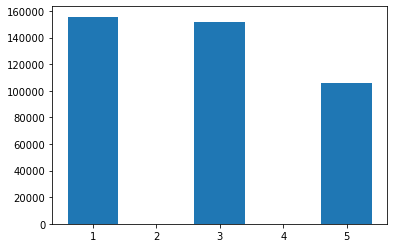

In [108]:
costos = [sol1.fun, sol3.fun, sol5.fun]
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.bar([1, 3, 5], costos)

## 2. Grafique los datos y el polinomio que mejor se ajuste

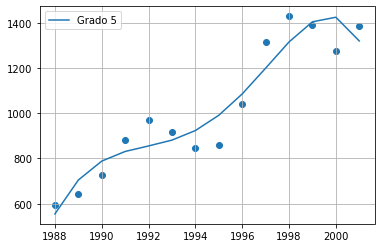

In [110]:
plt.figure()
plt.scatter(x + 1988, y)
plt.plot(x + 1988, X5 @ sol5.x, label="Grado 5")
plt.legend(loc="best")
plt.grid()

## 3. Diferencias entre interpolación y extrapolación

In [111]:
np.array([1, 0.5, 0.5**2, 0.5**3, 0.5**4, 0.5**5]) @ sol5.x

639.5311535234822

In [113]:
np.array([1, 23, 23**2, 23**3, 23**4, 23**5]) @ sol5.x

-31945.032428070375

La interpolación de un modelo con sobreajute es buena, pero debido al sobreajuste no generaliza, entonces la extrapolación es mala.